$y$: the class label, $x^{'}$: paraphrase of the input x, define reward $R(x^{'}) = \log P_{lm} (y | x^{'})$

$P(y | x) = \sum_{x^{'}} P(y, x^{'} | x) = \sum_{x^{'}} P_{\theta} (x^{'} | x) \times P_{lm} (y | x^{'})$

Policy Gradient (PG): $\sum_{x^{'} \in P_{\theta}} \log P_{\theta} (x^{'} | x) \times R(x^{'})$

MML: $\log \sum_{x^{'} \in P_{\theta}} P_{\theta} (x^{'} | x) \times \exp(R(x^{'}))$

We know that $MML \ge PG$


Policy Gradient with subtracting the reward of the original sentence + reward normalization:

Define reward of original input $R(x) = \log P_{lm} (y | x)$.

Define $Mean_{x}(R(x^{'}) - R(x)) = \frac{1}{\#x^{'}} \sum_{x^{'} \in P_{\theta}} R(x^{'}) - R(x)$.

$SD_{x}(R(x^{'}) - R(x)) = \sqrt{\frac{1}{\#x^{'}} \sum_{x^{'} \in P_{\theta}} \{R(x^{'}) - R(x) - Mean_{x}(R(x^{'}) - R(x))\}^2}$

Normalized Reward $NR(x^{'}) = \frac{(R(x^{'}) - R(x)) - Mean_{x}(R(x^{'}) - R(x))}{SD_{x}(R(x^{'}) - R(x))} = \frac{R(x^{'}) - Mean_x(R(x^{'}))}{SD_{x}(R(x^{'}))}$.

PG (z-score) = $\sum_{x^{'} \in P_{\theta}} \log P_{\theta} (x^{'} | x) \times NR(x^{'})$

# Consider adding the semantic similarity score given x' and x. (search semantic similarity scores! or the technique based on average embeddings.)
# Consider a reward promoting diversity between x' and x. negative rouge!
# Apply reward-normalization on each reward saparately.
# How we can mix reward normalization and self-critical training? (Should be better than beam-search samples.)
# Mix top-p sampling with Gumble-Softmax? (Do we need to?)


In [1]:
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
objectives = ["mml_basic", "mml_z_score", "pg_z_score", "pg_reward_diff"]
policies = ["off_policy", "on_policy"]
sampling_algorithms = ["top_p", "beam_search"]
seeds = ["11", "42", "1993", "2023", "12321"]

experiment_results: Dict[str, List[np.array]] = {}
experiment_steps: Dict[str, List[np.array]] = {}
for obj in objectives:
    for pol in policies:
        for sample_alg in sampling_algorithms:
            experiment_results[f"{obj}_{pol}_{sample_alg}"] = []
            experiment_steps[f"{obj}_{pol}_{sample_alg}"] = []
            for seed in seeds:
                if sample_alg == "top_p":
                    file = f"results/sst2-128-results/{seed}_0.00001_0_1_0_{obj}_{pol}.csv"
                else:
                    file = f"results/sst2-128-results/{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}.csv"
                df = pd.read_csv(file)
                step_arr = df["Step"].tolist()
                performance_arr = df["Value"].tolist()
                print(file, len(performance_arr))
                experiment_steps[f"{obj}_{pol}_{sample_alg}"].append(np.array(step_arr))
                experiment_results[f"{obj}_{pol}_{sample_alg}"].append(np.array(performance_arr))

results/sst2-128-results/11_0.00001_0_1_0_mml_basic_off_policy.csv 161
results/sst2-128-results/42_0.00001_0_1_0_mml_basic_off_policy.csv 161
results/sst2-128-results/1993_0.00001_0_1_0_mml_basic_off_policy.csv 161
results/sst2-128-results/2023_0.00001_0_1_0_mml_basic_off_policy.csv 161
results/sst2-128-results/12321_0.00001_0_1_0_mml_basic_off_policy.csv 161
results/sst2-128-results/11_0.00001_0_1_0_mml_basic_off_policy_beam_search.csv 161
results/sst2-128-results/42_0.00001_0_1_0_mml_basic_off_policy_beam_search.csv 161
results/sst2-128-results/1993_0.00001_0_1_0_mml_basic_off_policy_beam_search.csv 161
results/sst2-128-results/2023_0.00001_0_1_0_mml_basic_off_policy_beam_search.csv 161
results/sst2-128-results/12321_0.00001_0_1_0_mml_basic_off_policy_beam_search.csv 161
results/sst2-128-results/11_0.00001_0_1_0_mml_basic_on_policy.csv 161
results/sst2-128-results/42_0.00001_0_1_0_mml_basic_on_policy.csv 161
results/sst2-128-results/1993_0.00001_0_1_0_mml_basic_on_policy.csv 161
resu

In [30]:
def experiment_to_numpy(experiment_name: str) -> Tuple[np.array, np.array, np.array, np.array]:
    x = np.array(experiment_steps[experiment_name][0])
    y = np.array(experiment_results[experiment_name]) * 100.00
    print(experiment_name, x.shape, y.shape)
    mean_y = np.mean(y, axis=0)
    std_y = np.std(y, axis=0)
    return x, y, mean_y, std_y


experiment_means = {exp_name: experiment_to_numpy(exp_name)[2] for exp_name in experiment_results.keys()}
experiment_stds = {exp_name: experiment_to_numpy(exp_name)[3] for exp_name in experiment_results.keys()}
experiment_steps = {exp_name: experiment_to_numpy(exp_name)[0] for exp_name in experiment_results.keys()}

mml_basic_off_policy_top_p (161,) (5, 161)
mml_basic_off_policy_beam_search (161,) (5, 161)
mml_basic_on_policy_top_p (161,) (5, 161)
mml_basic_on_policy_beam_search (161,) (5, 161)
mml_z_score_off_policy_top_p (161,) (5, 161)
mml_z_score_off_policy_beam_search (161,) (5, 161)
mml_z_score_on_policy_top_p (161,) (5, 161)
mml_z_score_on_policy_beam_search (161,) (5, 161)
pg_z_score_off_policy_top_p (161,) (5, 161)
pg_z_score_off_policy_beam_search (161,) (5, 161)
pg_z_score_on_policy_top_p (161,) (5, 161)
pg_z_score_on_policy_beam_search (161,) (5, 161)
pg_reward_diff_off_policy_top_p (161,) (5, 161)
pg_reward_diff_off_policy_beam_search (161,) (5, 161)
pg_reward_diff_on_policy_top_p (161,) (5, 161)
pg_reward_diff_on_policy_beam_search (161,) (5, 161)
mml_basic_off_policy_top_p (161,) (5, 161)
mml_basic_off_policy_beam_search (161,) (5, 161)
mml_basic_on_policy_top_p (161,) (5, 161)
mml_basic_on_policy_beam_search (161,) (5, 161)
mml_z_score_off_policy_top_p (161,) (5, 161)
mml_z_score_o

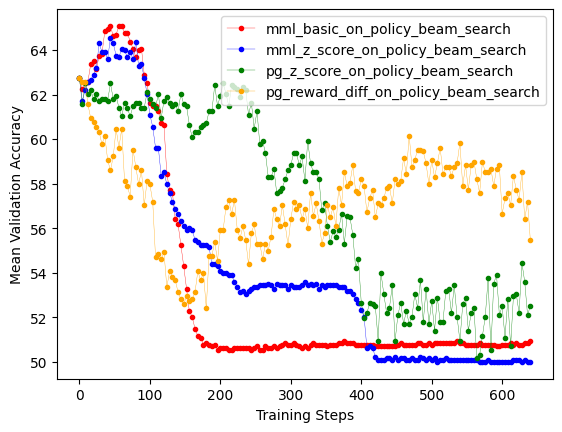

In [32]:
# beam_search experiments
# comparison between mml-basic and mml-z-score and pg-z-score and pg-reward-diff under on-policy training.


fig = plt.figure()

experiments_to_see = [
    "mml_basic_on_policy_beam_search",
    "mml_z_score_on_policy_beam_search",
    "pg_z_score_on_policy_beam_search",
    "pg_reward_diff_on_policy_beam_search",
]
colors = ["red", "blue", "green", "orange"]

for idx, exp in enumerate(experiments_to_see):
    plt.plot(experiment_steps[exp], experiment_means[exp], color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Validation Accuracy")

plt.show()

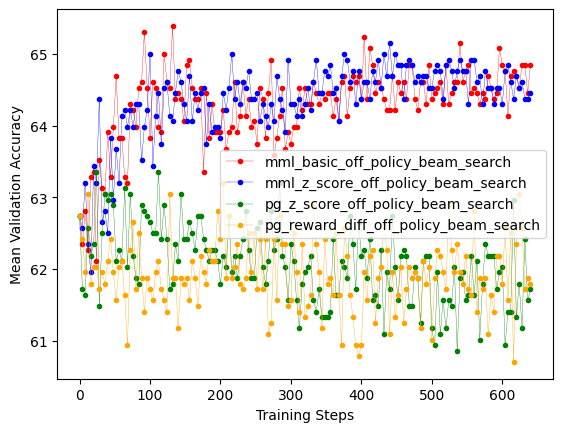

In [33]:
# beam_search experiments
# comparison between mml-basic and mml-z-score and pg-z-score and pg-reward-diff under off-policy training.


fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_beam_search",
    "mml_z_score_off_policy_beam_search",
    "pg_z_score_off_policy_beam_search",
    "pg_reward_diff_on_policy_beam_search",
]
colors = ["red", "blue", "green", "orange"]

for idx, exp in enumerate(experiments_to_see):
    plt.plot(experiment_steps[exp], experiment_means[exp], color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Validation Accuracy")

plt.show()

In [ ]:
# with beam search sampling for both on-policy and off-policy, mml is better than pg!

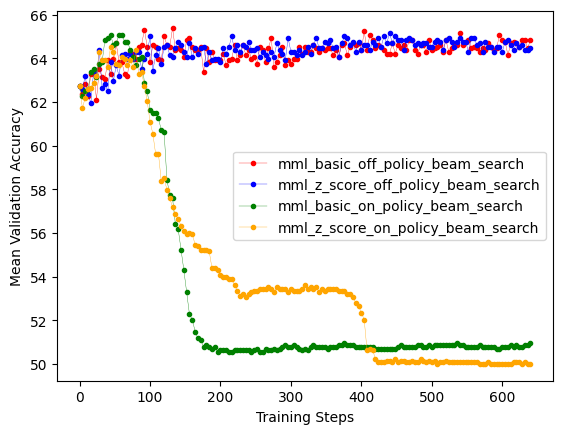

In [35]:
# comparison between mml-basic and mml-z-score under off-policy training or on-policy training.


fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_beam_search",
    "mml_z_score_off_policy_beam_search",
    "mml_basic_on_policy_beam_search",
    "mml_z_score_on_policy_beam_search",
]
colors = ["red", "blue", "green", "orange"]

for idx, exp in enumerate(experiments_to_see):
    plt.plot(experiment_steps[exp], experiment_means[exp], color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Validation Accuracy")

plt.show()

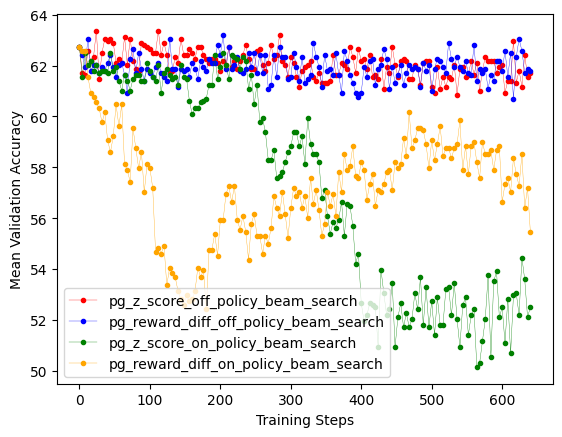

In [36]:
# comparison between pg-z-score and pg-reward-diff under off-policy training or on-policy training.


fig = plt.figure()

experiments_to_see = [
    "pg_z_score_off_policy_beam_search",
    "pg_reward_diff_off_policy_beam_search",
    "pg_z_score_on_policy_beam_search",
    "pg_reward_diff_on_policy_beam_search",
]
colors = ["red", "blue", "green", "orange"]

for idx, exp in enumerate(experiments_to_see):
    plt.plot(experiment_steps[exp], experiment_means[exp], color=colors[idx], marker=".", linewidth=0.25, label=exp)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Validation Accuracy")

plt.show()

In [47]:
# for both pg and mml, on-policy learning diverges!
# z-scoring is more robust to divergence as we give negative reward for an ungrammatical sample.
# z-scoring is not helpful for mml as expected.

# best model with beam search decoding:
# mml_basic_off_policy_beam_search.
seed_1_max = max(experiment_results["mml_basic_off_policy_beam_search"][0])
seed_2_max = max(experiment_results["mml_basic_off_policy_beam_search"][1])
seed_3_max = max(experiment_results["mml_basic_off_policy_beam_search"][2])
seed_4_max = max(experiment_results["mml_basic_off_policy_beam_search"][3])
seed_5_max = max(experiment_results["mml_basic_off_policy_beam_search"][4])

initial_result_1 = experiment_results["mml_basic_off_policy_beam_search"][0][0]
initial_result_2 = experiment_results["mml_basic_off_policy_beam_search"][1][0]
initial_result_3 = experiment_results["mml_basic_off_policy_beam_search"][2][0]
initial_result_4 = experiment_results["mml_basic_off_policy_beam_search"][3][0]
initial_result_5 = experiment_results["mml_basic_off_policy_beam_search"][4][0]

print(seed_1_max, seed_2_max, seed_3_max, seed_4_max, seed_5_max)
print(initial_result_1, initial_result_2, initial_result_3, initial_result_4, initial_result_5)
print(
    "gains:",
    seed_1_max - initial_result_1,
    seed_2_max - initial_result_2,
    seed_3_max - initial_result_3,
    seed_4_max - initial_result_4,
    seed_5_max - initial_result_5,
)
gain_average = seed_1_max - initial_result_1
gain_average += seed_2_max - initial_result_2
gain_average += seed_3_max - initial_result_3
gain_average += seed_4_max - initial_result_4
gain_average += seed_5_max - initial_result_5
print("gain average:", gain_average / 5.0 * 100.00)

0.68359375 0.66796875 0.64453125 0.6953125 0.6484375
0.6328125 0.60546875 0.59765625 0.6953125 0.60546875
gains: 0.05078125 0.0625 0.046875 0.0 0.04296875
gain average: 4.0625


In [48]:
# compute average gain per technique!
for exp in experiment_results.keys():
    gain = max(experiment_results[exp][0]) - experiment_results[exp][0][0]
    gain += max(experiment_results[exp][1]) - experiment_results[exp][1][0]
    gain += max(experiment_results[exp][2]) - experiment_results[exp][2][0]
    gain += max(experiment_results[exp][3]) - experiment_results[exp][3][0]
    gain += max(experiment_results[exp][4]) - experiment_results[exp][4][0]
    print(exp, (gain / 5.0) * 100)

mml_basic_off_policy_top_p 2.1875
mml_basic_off_policy_beam_search 4.0625
mml_basic_on_policy_top_p 0.78125
mml_basic_on_policy_beam_search 3.515625
mml_z_score_off_policy_top_p 2.421875
mml_z_score_off_policy_beam_search 3.75
mml_z_score_on_policy_top_p 0.15625
mml_z_score_on_policy_beam_search 2.8125
pg_z_score_off_policy_top_p 3.8281250000000004
pg_z_score_off_policy_beam_search 2.734375
pg_z_score_on_policy_top_p 2.03125
pg_z_score_on_policy_beam_search 3.046875
pg_reward_diff_off_policy_top_p 2.1875
pg_reward_diff_off_policy_beam_search 2.578125
pg_reward_diff_on_policy_top_p 2.265625
pg_reward_diff_on_policy_beam_search 3.046875
